# Importing Necessary Libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score


# Importing the Dataset

In [116]:
filepath = r"C:\Users\padma\Desktop\Computer_Science\al-ml\Datasets\Classification\Wholesale customers data.csv"

data = pd.read_csv(filepath)

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Data PreProcessing

## Analyzing Data

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


The data has no null values and all the features are numerical.

In [118]:
data.shape

(440, 8)

In [119]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


even though it a wholesale customers data, the min value of some features is a single digit.

In [120]:
#Checking for duplicated rows
data.duplicated().sum()

0

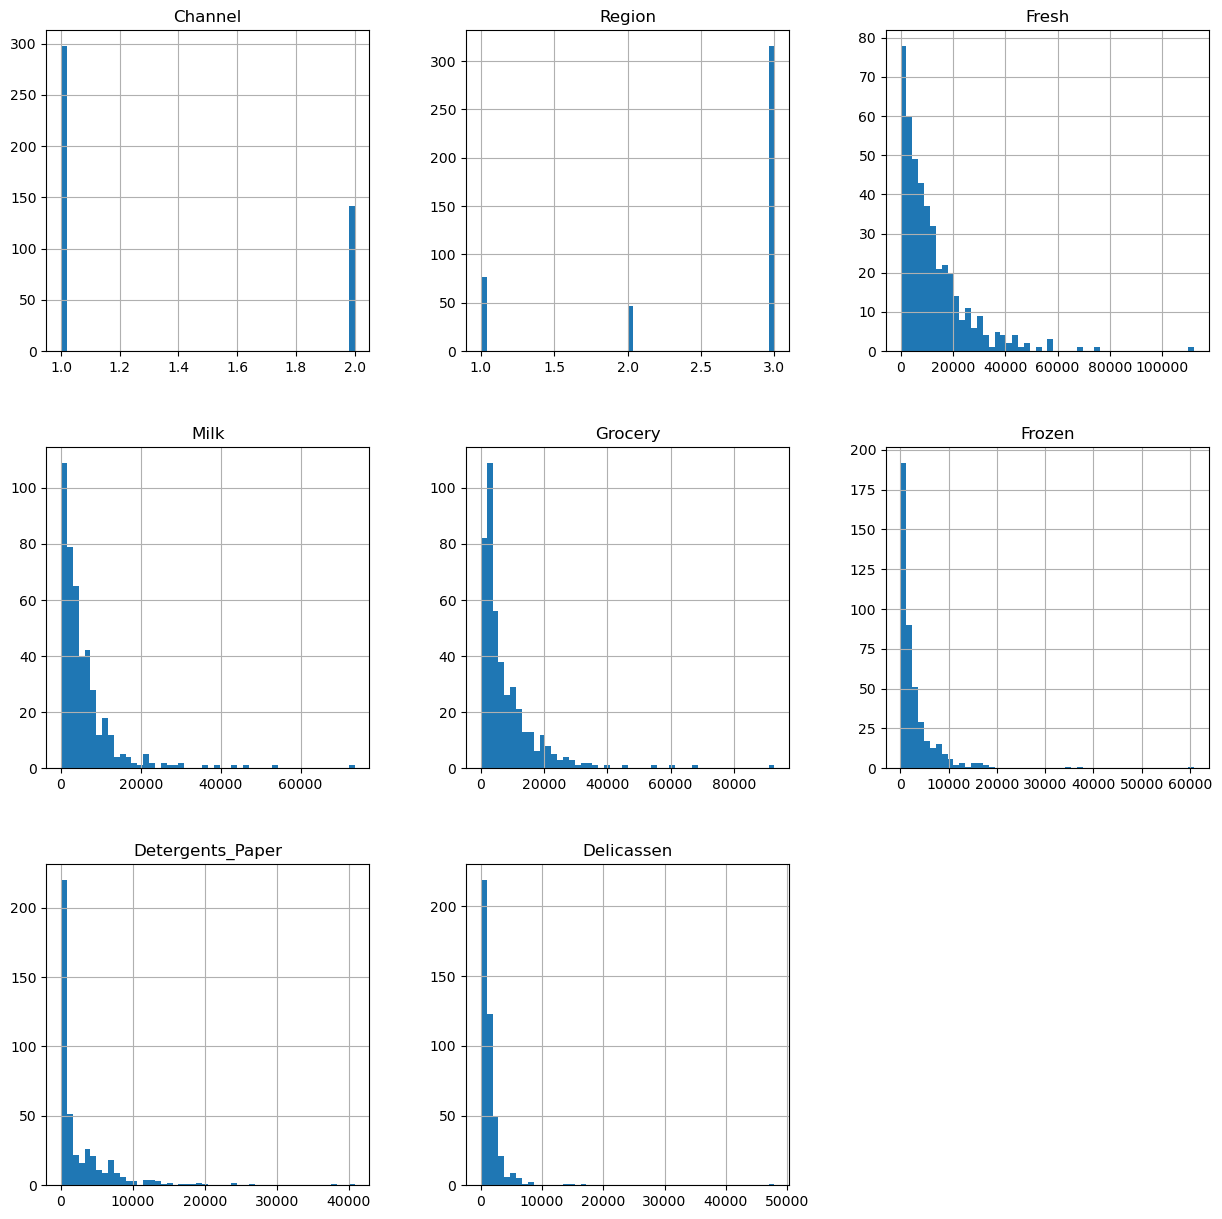

In [121]:

data.hist(figsize=(15,15), bins = 50)
plt.show()

## Detecting Outliers

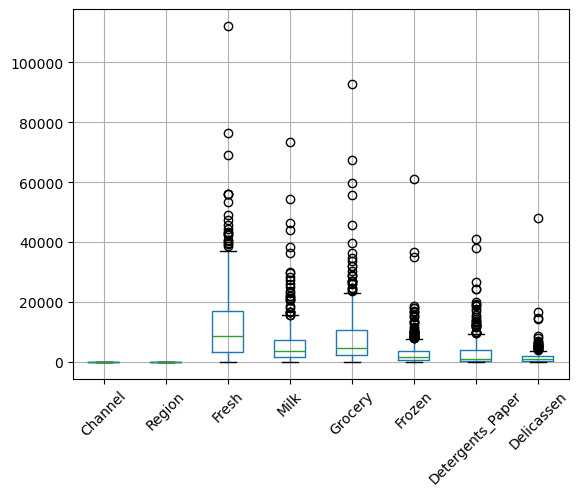

In [122]:
data.boxplot(rot=45)
plt.show()

from the boxplot, no meaningful insight cant be taken

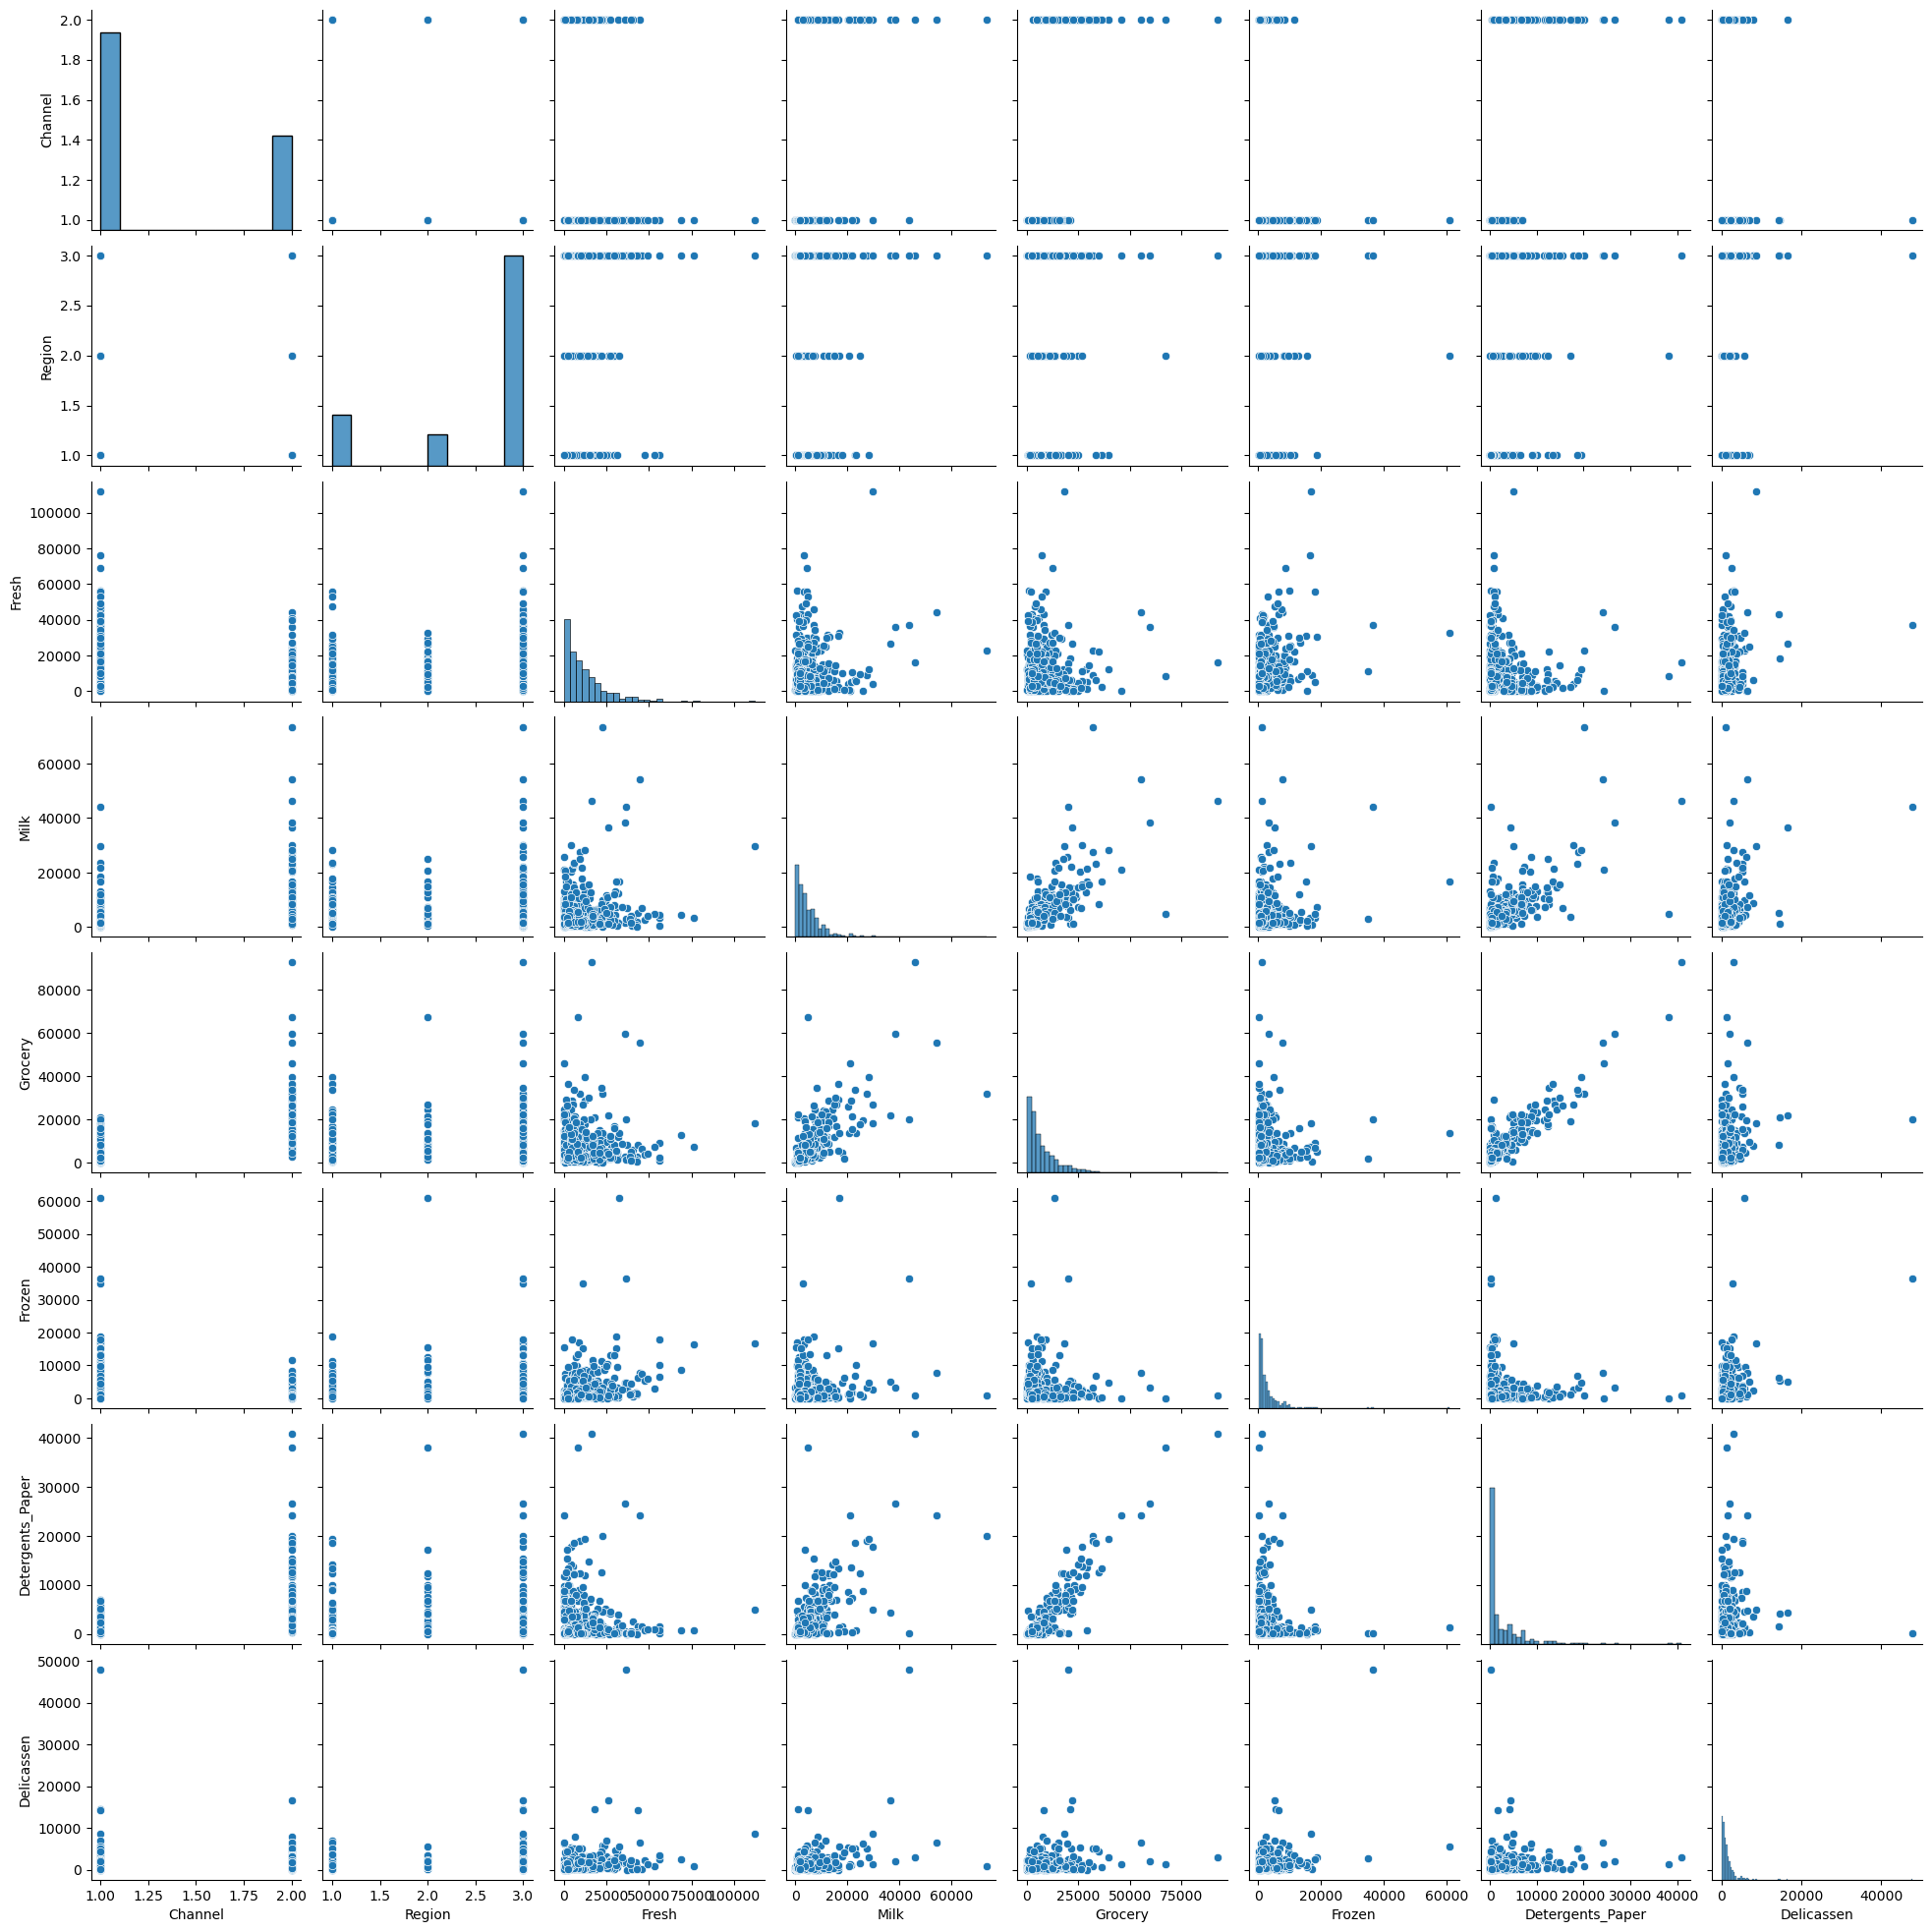

In [123]:
sns.pairplot(data)
plt.show()

Changing some of the very extreme values in the data with the median (most of the data is skewed)

##### Column Fresh

In [124]:
data[data['Fresh'] >100000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550


In [125]:
data.loc[data['Fresh'] >100000, 'Fresh'] = np.round(data['Fresh'].median())

##### Column Milk

In [126]:
data[data['Milk'] >60000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,2,3,22925,73498,32114,987,20070,903


In [127]:
data.loc[data['Milk'] >60000, 'Milk'] = np.round(data['Milk'].median())

##### Column Grocery

In [128]:
data[data['Grocery'] >80000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117,46197,92780,1026,40827,2944


In [129]:
data.loc[data['Grocery'] > 80000, 'Grocery'] = np.round(data['Grocery'].median())

##### Column Frozen

In [130]:
data[data['Frozen'] >60000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
325,1,2,32717,16784,13626,60869,1272,5609


In [131]:
data.loc[data['Frozen'] > 60000, 'Frozen'] = np.round(data['Frozen'].median())

##### Column Detergents_Paper

In [132]:
data[data['Detergents_Paper'] > 30000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117,46197,4756,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215


In [133]:
data.loc[data['Detergents_Paper'] > 30000, 'Detergents_Paper'] = np.round(data['Detergents_Paper'].median())

##### Column Delicassen

In [134]:
data[data['Delicassen'] > 40000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
183,1,3,36847,43950,20170,36534,239,47943


In [135]:
data.loc[data['Delicassen'] > 40000, 'Delicassen'] = np.round(data['Delicassen'].median())

As this is a wholesale customer data, checking for single digit values

In [136]:
for column in data.columns:
     count = data.loc[data[column]< 10, column]
     print(column, count.shape) 

Channel (440,)
Region (440,)
Fresh (3,)
Milk (0,)
Grocery (1,)
Frozen (0,)
Detergents_Paper (5,)
Delicassen (6,)


In [140]:
#Replacing the single digit values with the median of the features
for column in data.columns:
     if column != 'Channel' and column != 'Region':
        data.loc[data[column]< 10, column] = np.ceil(data[column].median())

# Scaling the data

In [ ]:
x = data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)


8.709339805106692

# PCA

In [142]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x_scaled)

In [144]:
pca.explained_variance_ratio_*100
# More than 50% of the data's variance is explained by these 2 principal components

array([38.83381362, 19.98600381])

Since there is no description about the data and no specific domain knowledge, we dont know the exact number of expected clusters.

So here we are taking different metrics to select the best clustering, like the silhoutte and wcss score.

# Kmeans

In [145]:
values = np.arange(1,15)
wcss_list = []
for k in values:
    cluster = KMeans(n_clusters=k,n_init=10,verbose=0)
    cluster.fit(x)
    wcss = cluster.inertia_
    wcss_list.append(wcss)
    

d:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

In [146]:
wcss_list

[127104683779.41818,
 88000630440.92458,
 60066366408.078995,
 49639808339.75783,
 40801118374.152115,
 35596511507.29378,
 32935877201.01648,
 29071226006.642525,
 26386446424.496384,
 25409254573.56074,
 23348312499.65969,
 21567395922.62276,
 20212791971.99312,
 19381500469.88446]

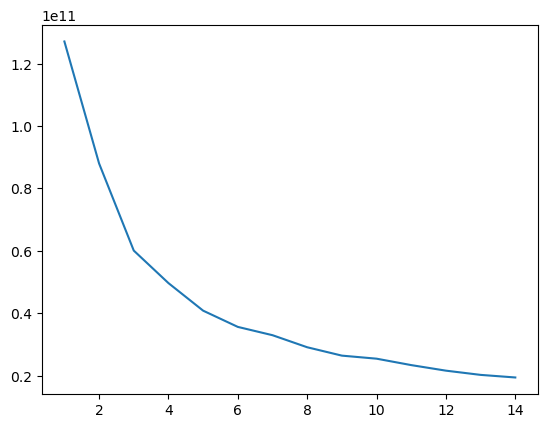

In [147]:
plt.plot(np.arange(1,15), wcss_list)
plt.show()

In [152]:
cluster = KMeans(n_clusters=4, n_init=10)
cluster.fit(x_scaled)
labels = cluster.predict(x_scaled)
labels

d:\Code\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1,
       0, 2, 3, 3, 1, 1, 2, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 2, 3, 1, 1, 3, 2, 3, 3, 1, 2,
       1, 3, 1, 1, 0, 0, 1, 3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 2, 2, 0,
       1, 0, 1, 0, 2, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3,
       1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 0, 0, 3,
       1, 1, 3, 2, 0, 1, 1, 3, 1, 3, 1, 3, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1,
       1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       3, 0, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 3, 1, 3, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 3,

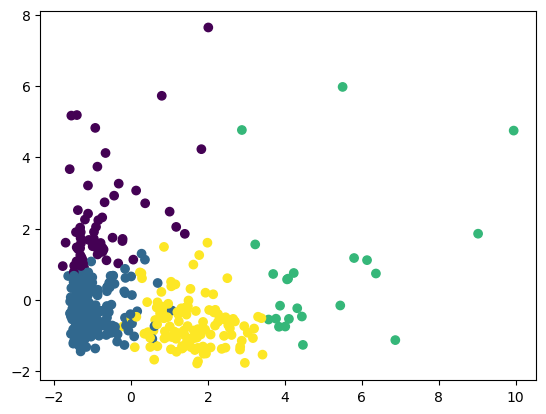

In [153]:
plt.scatter(pca_data[:,0], pca_data[:,1], c= labels)
plt.show()

# Agglomerative HC

In [154]:
silhoutes = []

values = np.arange(2,15)
wcss_list = []
for k in values:
    cluster = AgglomerativeClustering(n_clusters= k,metric='euclidean', linkage='ward')
    cluster.fit(x_scaled)
    score = silhouette_score(x_scaled,cluster.labels_)
    silhoutes.append(score)

In [155]:
silhoutes

[0.3468506914636113,
 0.29579235311131874,
 0.3017217545916442,
 0.2791759094250068,
 0.3080314521250866,
 0.32076840679554364,
 0.32385020263168374,
 0.3260024666233414,
 0.3304029830393113,
 0.32788873779464495,
 0.2549596019564386,
 0.22251642142752873,
 0.2255830563560996]

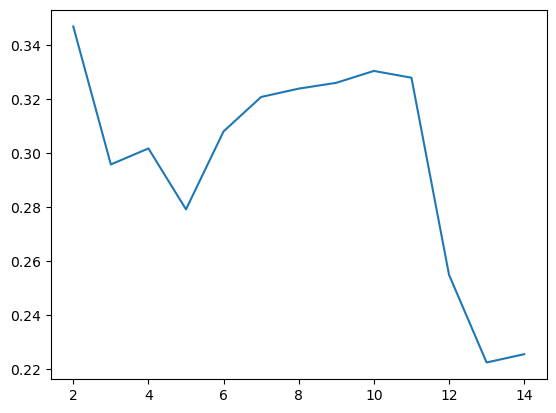

In [156]:
plt.plot(np.arange(2,15), silhoutes)
plt.show()

In [159]:
cluster = AgglomerativeClustering(n_clusters= 3,metric='euclidean', linkage='ward')
labels =cluster.fit_predict(x_scaled)
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

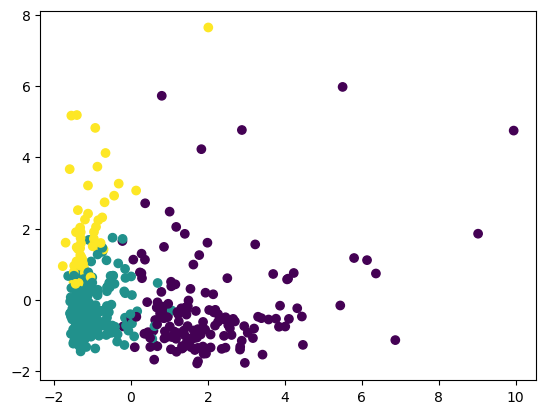

In [160]:
plt.scatter(pca_data[:,0], pca_data[:,1], c= labels)
plt.show()

# DBSCAN

In [246]:
x_values =[]
scores =[]
for i in np.arange(0.1,4,0.2):
    for j in np.arange(2,5):
        db = DBSCAN(eps= i, min_samples= j)
        labels = db.fit_predict(x_scaled)

        if len(np.unique(labels)) > 1:
            score = silhouette_score(x_scaled,labels)
            scores.append(score)
            x_values.append(f'{i,j}')

In [247]:
x_values[scores.index(score.max())]

'(3.3000000000000007, 3)'

but when 3.3 is used as eps, the clustering has only 1 cluster and the rest are all noises. So a value below 3 is needed

In [256]:
db = DBSCAN(eps= 1.9, min_samples= 3)   #after fine tuning the, value of eps = nearly 2 gives a good result

labels = db.fit_predict(x_scaled)
labels

# -1 is labelled as a noise by dbscan

array([ 0,  0, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  2,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  2,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0, -1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1, -1,  1,  1,
        1,  1,  0,  1,  1

In [257]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

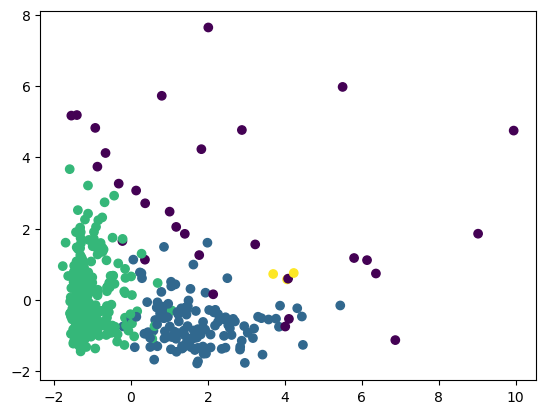

In [258]:
plt.scatter(pca_data[:,0], pca_data[:,1], c= labels)
plt.show()

In [259]:
silhouette_score(x_scaled,labels)

0.3130365794200841